In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import BayesianRidge
import time
from random import randint
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.naive_bayes import BernoulliNB
from imblearn.over_sampling import SMOTE
import collections
from imblearn.under_sampling import RandomUnderSampler


In [ ]:
!pip install https://github.com/JamesRitchie/scikit-rvm/archive/master.zip
from skrvm import RVR,RVC

     - 10.8 kB 46.8 MB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-rvm: filename=scikit_rvm-0.1.0a1-py3-none-any.whl size=4219 sha256=838624475ed72dc2d96d1f47b2884340a7fb50953063410f2d71dda46da19df8
  Stored in directory: /tmp/pip-ephem-wheel-cache-t5ew0gn1/wheels/38/97/92/d2154117423998a97dee555851d446e94a40de60cb42351729
Successfully built scikit-rvm


In [ ]:
# read data
df = pd.read_csv('winequality-red.csv')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#extract features and class
X_1 = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

In [ ]:
#Correlation matrix
corrMatrix = X_1.corr();

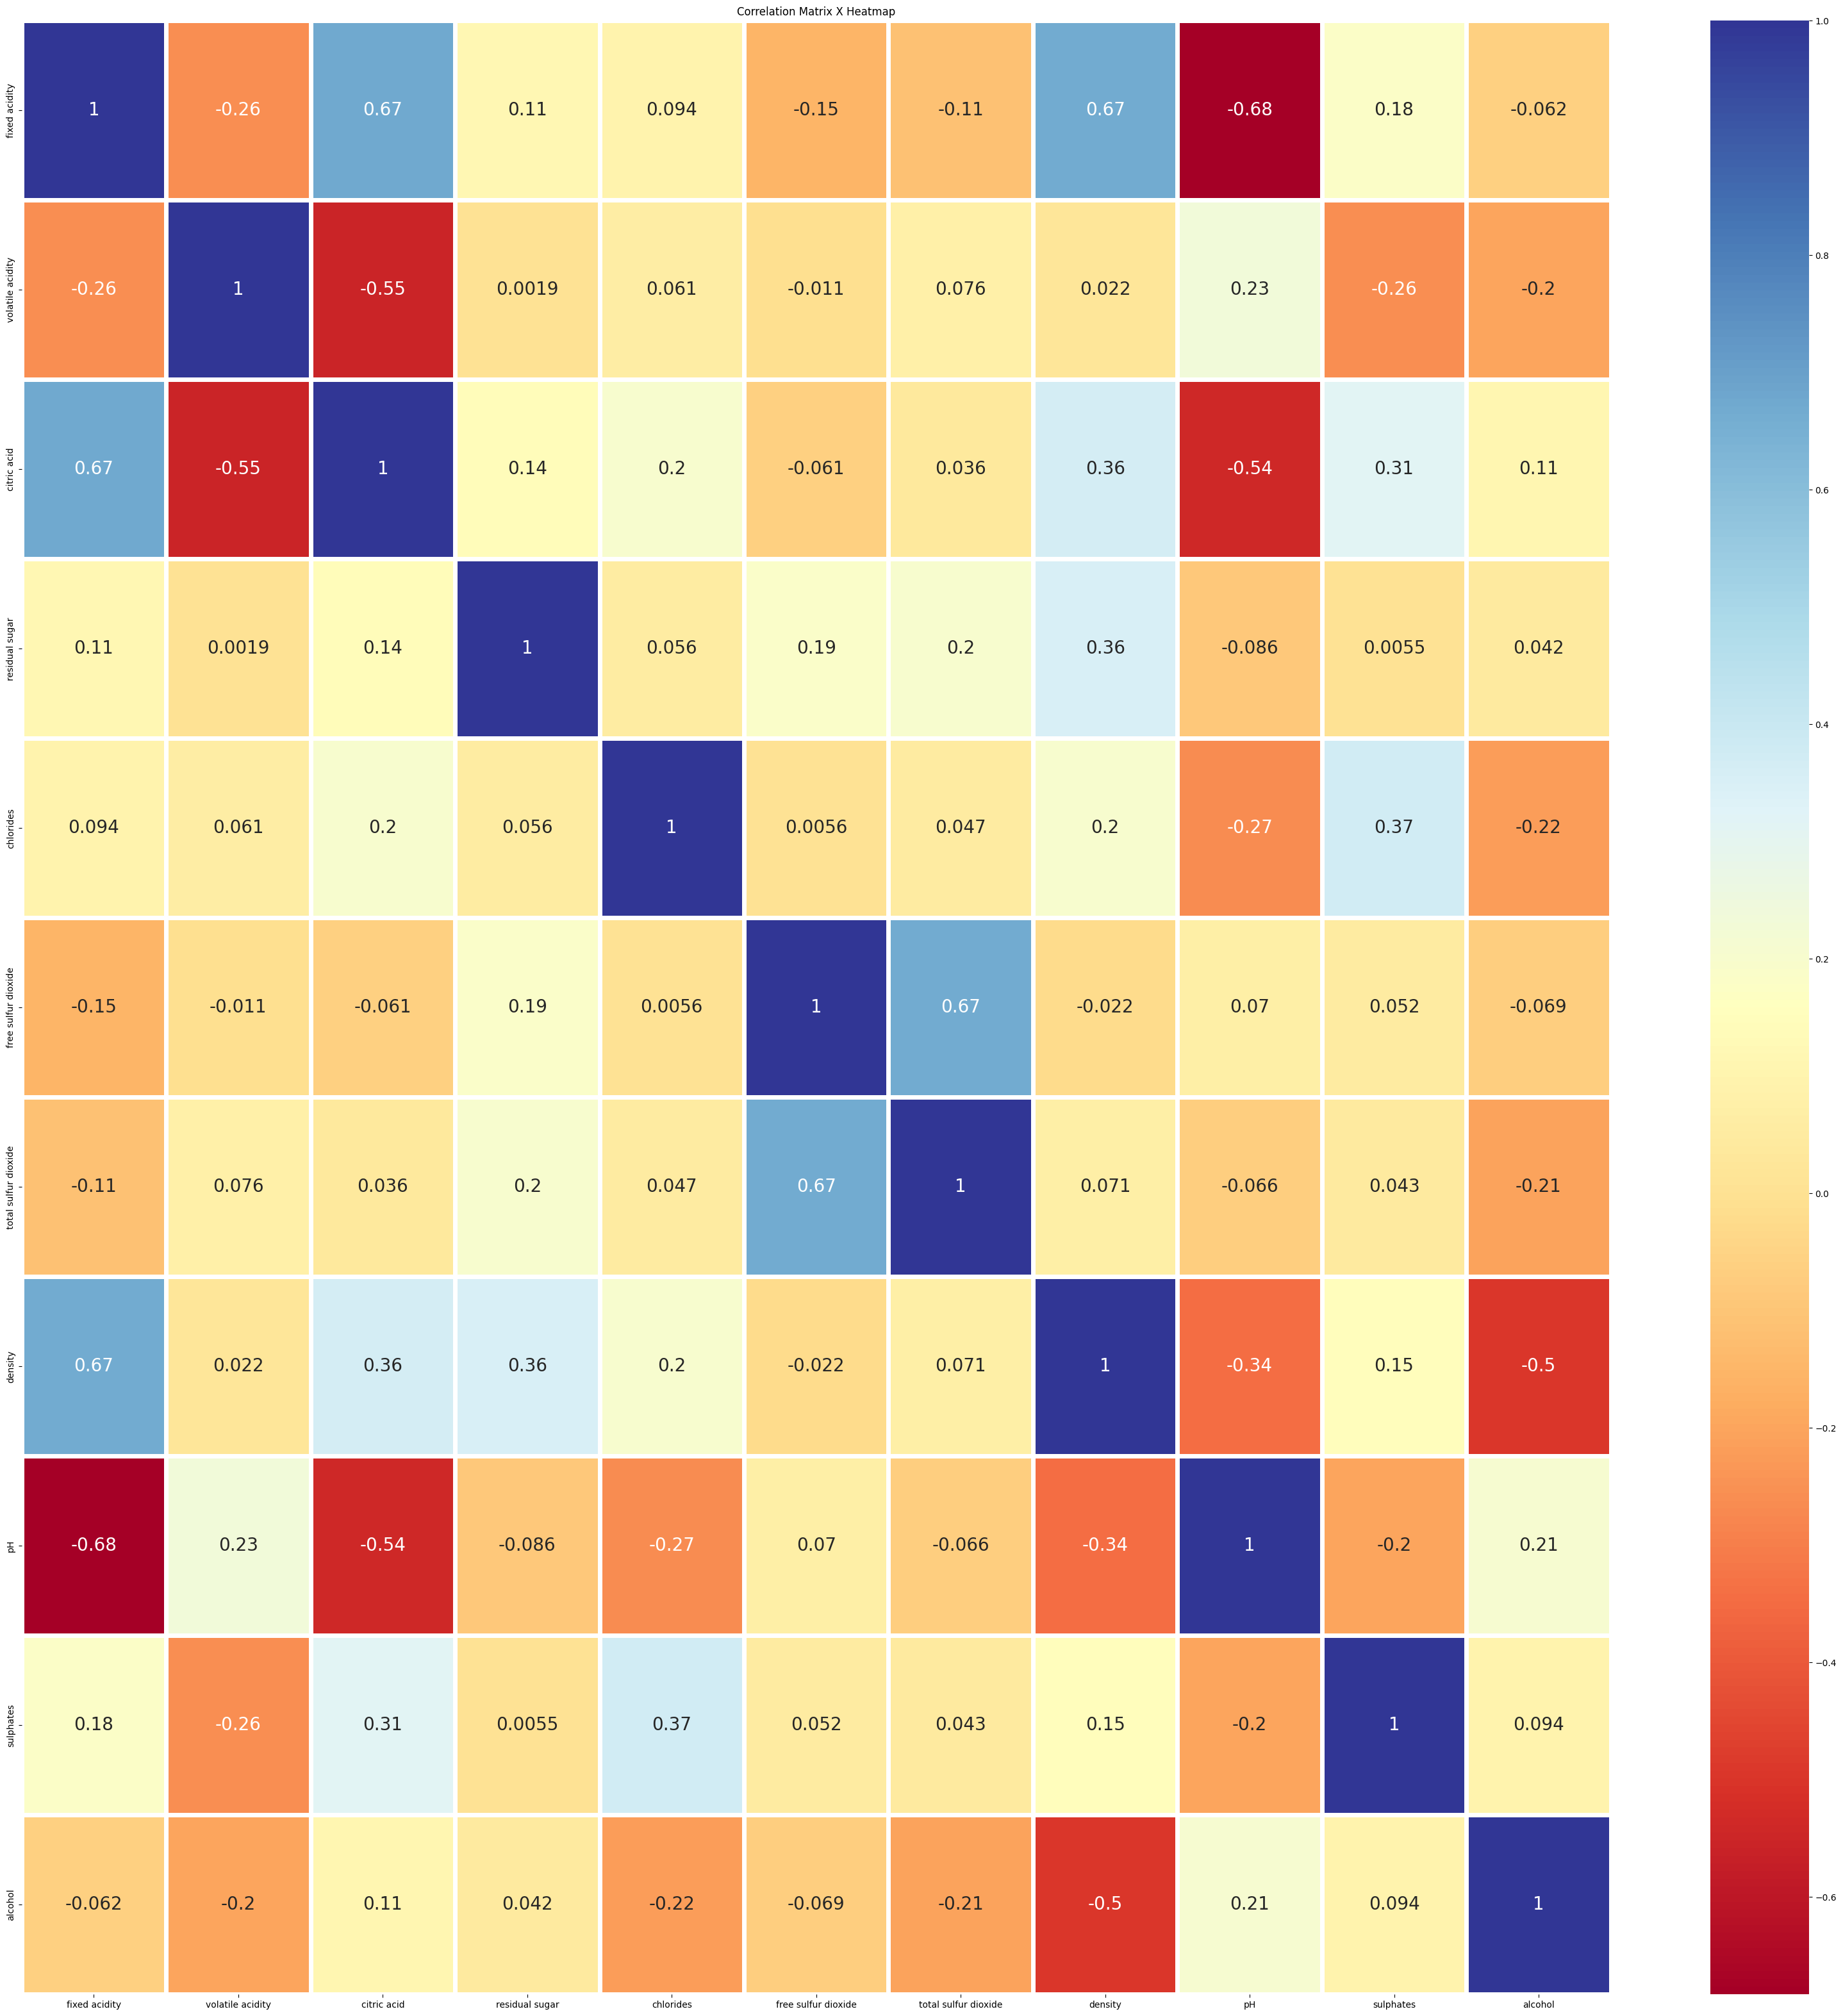

In [ ]:
#Heatmap of correlation matrix X
plt.figure(figsize=(40, 40))
sn.heatmap(corrMatrix, annot=True, cmap='RdYlBu', linewidths = 5,annot_kws={"size": 20})
plt.title('Correlation Matrix X Heatmap')
plt.show()

correlation between each feature is low. Highest is 0.68. So we keep all features.

In [ ]:
#count values in quality column
column_name = 'quality'

# Calculate the value counts for the column
value_counts = df[column_name].value_counts()

print("Unique values and their counts in column '{}':".format(column_name))
print(value_counts)

Unique values and their counts in column 'quality':
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


In [ ]:
#check for null values
null_values_total = df.isnull().sum()
null_values_total

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Binary Classification (Threshold ≥ 7)

In [ ]:
#copy df to df_copy
df_copy = df.copy()

In [ ]:
#replace quality with ratings
df_copy = df_copy.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Bad',
                                    5 : 'Bad',
                                    4 : 'Bad',
                                    3 : 'Bad'}})

In [ ]:
#count values in quality column
column_name = 'quality'

# Calculate the value counts for the column
value_counts = df_copy[column_name].value_counts()

print("Unique values and their counts in column '{}':".format(column_name))
print(value_counts)

Unique values and their counts in column 'quality':
Bad     1382
Good     217
Name: quality, dtype: int64


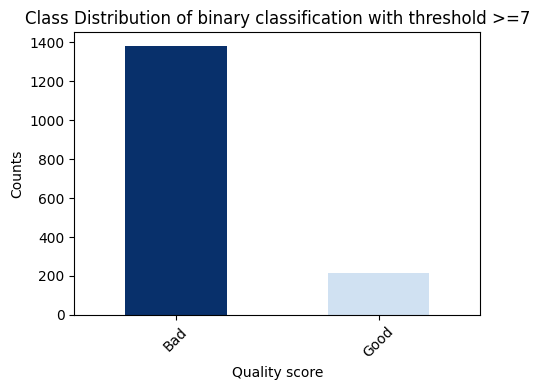

In [ ]:
#code to plot the distributions
normalized_counts = (value_counts - value_counts.min()) / (value_counts.max() - value_counts.min())* 0.8 + 0.2

# Define colors based on normalized counts
colors = plt.cm.Blues(normalized_counts)

# Plotting
plt.figure(figsize=(5, 4))
value_counts.plot(kind='bar', color=colors)
plt.xlabel('Quality score')
plt.ylabel('Counts')
plt.title('Class Distribution of binary classification with threshold >=7')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
#extract features and class
X_2 = df_copy[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_2 = df_copy['quality']

In [ ]:
#train-test split keeping ratio of each training class equal using stratify
Shuffle_state = 4720
X_trainunscaled, X_testunscaled, y_train, y_test = train_test_split(X_2,y_2, test_size=0.25,random_state=4720,stratify = y)

In [ ]:
#Scaling of train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trainunscaled)

In [ ]:
#Scaling of test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_testunscaled)

In [ ]:
#ratio of total data
ratio = (df_copy['quality'].value_counts()/ len(df_copy))*100
ratio

Bad     86.429018
Good    13.570982
Name: quality, dtype: float64

In [ ]:
#ratio of test data
ratio = (y_test.value_counts())
ratio

Bad     345
Good     55
Name: quality, dtype: int64

In [ ]:
#ratio of test data
ratio = (y_test.value_counts()/ df_copy['quality'].value_counts())*100
ratio

Bad     24.963821
Good    25.345622
Name: quality, dtype: float64

In [ ]:
#ratio of test data
ratio = (y_train.value_counts()/ df_copy['quality'].value_counts())*100
ratio

Bad     75.036179
Good    74.654378
Name: quality, dtype: float64

In [ ]:
#model evaluation function
labels = ['Bad', 'Good']
def model_evaluation(y_test,y_prediction,labels):
    Accuracy = accuracy_score(y_test, y_prediction)
    print("Accuracy: " + str(Accuracy*100))
    cm = confusion_matrix(y_test, y_prediction)
    print(cm)

## NON BAYESIAN METHODS

### SVM

In [ ]:
#parameters for cross validation for SVM
svm_param_grid = {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.01, 0.1, 1,10,100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Hyperparameter tuning for SVM using random search
start_time = time.time()
svc = SVC()
#svc_grid = GridSearchCV(svc, svm_param_grid,cv=5)
svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid.fit(X_train, y_train)
best_svc_params = svc_grid.best_params_
best_svc = svc_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 14.378260850906372 seconds


In [ ]:
#Best SVC parameter from the random search
print('{}:{}'.format(best_svc_params,best_svc))

{'kernel': 'rbf', 'gamma': 100, 'C': 10}:SVC(C=10, gamma=100)


In [ ]:
#SVM model training using best random search parameters

clf_svm = SVC(C=100,gamma=10, kernel='rbf')
clf_svm.fit(X_train, y_train)
y_prediction_svm = clf_svm.predict(X_test)

In [ ]:
#SVM model evaluation for random search
model_evaluation(y_test,y_prediction_svm,labels)

Accuracy: 88.25
[[345   0]
 [ 47   8]]


In [ ]:
#Hyperparameter tuning for SVM using gridsearch
start_time = time.time()
svc2 = SVC()
svc_grid2 = GridSearchCV(svc2, svm_param_grid,cv=5)
#svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid2.fit(X_train, y_train)
best_svc_params2 = svc_grid2.best_params_
best_svc2 = svc_grid2.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 523.8073101043701 seconds


In [ ]:
#Best SVC parameter from the grid search
print('{}:{}'.format(best_svc_params2,best_svc2))

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}:SVC(C=1, gamma=1)


In [ ]:
#SVM model training using grid search parameters
clf_svm2 = SVC(C=1,gamma=1, kernel='rbf')
clf_svm2.fit(X_train, y_train)
y_prediction_svm2 = clf_svm2.predict(X_test)

In [ ]:
#SVM model evaluation
model_evaluation(y_test,y_prediction_svm2,labels)

Accuracy: 89.5
[[340   5]
 [ 37  18]]


### Logistic Regression

In [ ]:
#parameters for grid search for Logistic Regression
LR_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Hyperparameter tuning for LR using gridsearch
start_time = time.time()
LR = LogisticRegression(max_iter = 2000)
LR_grid = GridSearchCV(LR, LR_param_grid,cv=5)
#LR_grid = RandomizedSearchCV(estimator = LR, param_distributions = LR_param_grid, cv=5, random_state=42)
LR_grid.fit(X_train, y_train)
best_LR_params = LR_grid.best_params_
best_LR = LR_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.42772936820983887 seconds


In [ ]:
#Best LR parameter from the grid search
print('{}'.format(best_LR_params))

{'C': 1}


In [ ]:
#LR model training

clf_lr = LogisticRegression(C = 1.2)
clf_lr.fit(X_train, y_train)
y_prediction_lr = clf_lr.predict(X_test)

In [ ]:
#LR model evaluation
model_evaluation(y_test,y_prediction_lr,labels)

Accuracy: 87.75
[[332  13]
 [ 36  19]]


### Random Forest

In [ ]:
from scipy import stats

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50],'min_samples_split': list(stats.randint(1, 30 + 1).rvs(size=29)), 'min_samples_leaf': list(stats.randint(1, 30 + 1).rvs(size=29))}

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30],'min_samples_split': list(range(2,5)), 'min_samples_leaf': list(range(2,5))}

In [ ]:
#Random search for hyperparameter tuning for random forest
start_time = time.time()
RF = RandomForestClassifier(random_state=42)
RF_grid = RandomizedSearchCV(estimator = RF, param_distributions = RF_param_grid, cv=5, random_state=42)
#RF_grid = GridSearchCV(RF, RF_param_grid,cv=5)
RF_grid.fit(X_train, y_train)
best_RF_params = RF_grid.best_params_
best_RF = RF_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 26.37883448600769 seconds


In [ ]:
#Best hyperparameter from the random forest
print('{}'.format(best_RF_params))

{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_depth': 30}


In [ ]:
#RF model training
clf_RF = RandomForestClassifier(n_estimators = 200, random_state=42, max_depth = 30,min_samples_leaf = 4,min_samples_split= 3)
clf_RF.fit(X_train, y_train)
y_prediction_RF = clf_RF.predict(X_test)

In [ ]:
#RF model evaluation
model_evaluation(y_test,y_prediction_RF,labels)

Accuracy: 90.0
[[339   6]
 [ 34  21]]


### KNN

In [ ]:
#define hyperparameter for KNN
knn_param_grid = {
    'n_neighbors': list(range(1, 10))
}

In [ ]:
#Grid search for hyperparameter tuning for knn
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
#knn_grid = RandomizedSearchCV(estimator = knn_model, param_distributions = knn_param_grid, cv=10, random_state=42)
knn_grid.fit(X_train, y_train)
best_knn_params = knn_grid.best_params_
best_knn = knn_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.9975168704986572 seconds


In [ ]:
#Best hyperparameter from the knn
print('{}'.format(best_knn_params))

{'n_neighbors': 2}


In [ ]:
#KNN model training
clf_knn = KNeighborsClassifier(n_neighbors = 2)
clf_knn.fit(X_train, y_train)
knn_predictions = clf_knn.predict(X_test)

In [ ]:
#KNN model evaluation
model_evaluation(y_test,knn_predictions,labels)

Accuracy: 88.75
[[336   9]
 [ 36  19]]


### MLP

In [ ]:
#hyperparameters for the mlp
mlp_param_grid = {'hidden_layer_sizes': [(50), (50,50), (100,100,100)], 'alpha': [0.0001, 0.001, 0.01], 'activation': ['relu', 'tanh'],'solver': ['adam', 'sgd'], 'max_iter': [300, 400, 500]}

In [ ]:
#Random search for hyperparameter tuning for mlp
start_time = time.time()
mlp_classifier = MLPClassifier(random_state=42)
mlp_grid = RandomizedSearchCV(estimator = mlp_classifier, param_distributions = mlp_param_grid, cv=5, random_state=42)
mlp_grid.fit(X_train, y_train)
best_mlp_params = mlp_grid.best_params_
best_mlp = mlp_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interru

Runtime: 166.3710744380951 seconds


In [ ]:
print('{}:{}'.format(best_mlp_params,best_mlp))

{'solver': 'adam', 'max_iter': 300, 'hidden_layer_sizes': (100, 100, 100), 'alpha': 0.001, 'activation': 'relu'}:MLPClassifier(alpha=0.001, hidden_layer_sizes=(100, 100, 100), max_iter=300,
              random_state=42)


In [ ]:
#mlp training
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=(100,100,100),solver = 'adam',activation = 'relu',max_iter= 300, random_state = 42)
mlp.fit(X_train, y_train)
y_prediction_mlp = mlp.predict(X_test)

In [ ]:
#MLP model evaluation
model_evaluation(y_test,y_prediction_mlp,labels)

Accuracy: 89.75
[[328  17]
 [ 24  31]]


### Naive Bayes

In [ ]:
param_grid = {
    'priors': [None, [0.3, 0.7], [0.1, 0.9]],
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [ ]:
#Grid search for hyperparameter tuning for naive bayes
start_time = time.time()
nb_model = GaussianNB()
nb_grid = GridSearchCV(nb_model, param_grid, cv=5)
nb_grid.fit(X_train, y_train)
best_nb_params = nb_grid.best_params_
best_nb = nb_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.17949128150939941 seconds


In [ ]:
#Best hyperparameter from the naive bayes
print('{}'.format(best_nb))

GaussianNB()


In [ ]:
#NB model training
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
nb_predictions = clf_nb.predict(X_test)

In [ ]:
#Naive Bayes model evaluation
model_evaluation(y_test,nb_predictions,labels)

Accuracy: 84.0
[[299  46]
 [ 18  37]]


## BAYESIAN METHODS
### RVM

In [ ]:
#RVM model training
start_time = time.time()
rvm = RVC(kernel='linear')
rvm.fit(X_train, y_train)
rvm_predictions = rvm.predict(X_test)
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 73.68062925338745 seconds


In [ ]:
#RVM model evaluation
model_evaluation(y_test,rvm_predictions,labels)

Accuracy: 87.25
[[331  14]
 [ 37  18]]


# Binary Classification (Threshold ≥ 6)

In [ ]:
#copy df to df_copy
df_copy2 = df.copy()

In [ ]:
#replace quality with ratings
df_copy2 = df_copy2.replace({'quality' : {
                                    8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Good',
                                    5 : 'Bad',
                                    4 : 'Bad',
                                    3 : 'Bad'}})

In [ ]:
#count values in quality column
column_name = 'quality'

# Calculate the value counts for the column
value_counts = df_copy2[column_name].value_counts()

print("Unique values and their counts in column '{}':".format(column_name))
print(value_counts)

Unique values and their counts in column 'quality':
Good    855
Bad     744
Name: quality, dtype: int64


In [ ]:
value_counts

Good    855
Bad     744
Name: quality, dtype: int64

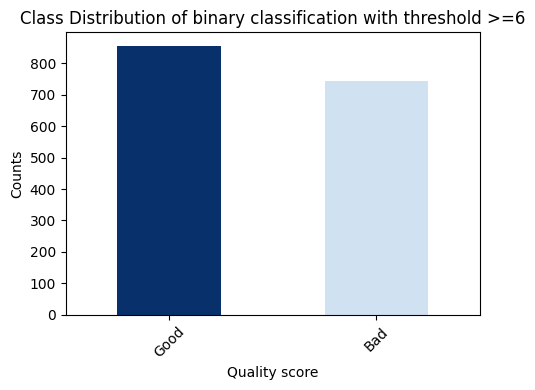

In [ ]:
normalized_counts = (value_counts - value_counts.min()) / (value_counts.max() - value_counts.min())* 0.8 + 0.2

# Define colors based on normalized counts
colors = plt.cm.Blues(normalized_counts)

# Plotting
plt.figure(figsize=(5, 4))
value_counts.plot(kind='bar', color=colors)
plt.xlabel('Quality score')
plt.ylabel('Counts')
plt.title('Class Distribution of binary classification with threshold >=6')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
#extract features and class
X_3 = df_copy2[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_3 = df_copy2['quality']

In [ ]:
#train-test split keeping ratio of each training class equal using stratify
Shuffle_state = 4720
X_trainunscaled, X_testunscaled, y_train, y_test = train_test_split(X_3,y_3, test_size=0.25,random_state=4720,stratify = y)

In [ ]:
#Scaling of train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trainunscaled)

In [ ]:
#Scaling of test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_testunscaled)

In [ ]:
#ratio of total data
ratio = (df_copy2['quality'].value_counts()/ len(df_copy2))*100
ratio

Good    53.470919
Bad     46.529081
Name: quality, dtype: float64

In [ ]:
#ratio of test data
ratio = (y_test.value_counts())
ratio

Good    215
Bad     185
Name: quality, dtype: int64

In [ ]:
#ratio of test data
ratio = (y_test.value_counts()/ df_copy2['quality'].value_counts())*100
ratio

Good    25.146199
Bad     24.865591
Name: quality, dtype: float64

In [ ]:
#ratio of test data
ratio = (y_train.value_counts()/ df_copy2['quality'].value_counts())*100
ratio

Good    74.853801
Bad     75.134409
Name: quality, dtype: float64

In [ ]:
#model evaluation function
labels = ['Bad', 'Good']
def model_evaluation(y_test,y_prediction,labels):
    Accuracy = accuracy_score(y_test, y_prediction)
    print("Accuracy: " + str(Accuracy*100))
    cm = confusion_matrix(y_test, y_prediction)
    print(cm)

## NON BAYESIAN METHODS

### SVM

In [ ]:
#parameters for cross validation for SVM
svm_param_grid = {'C': [0.01,0.1, 1,100],'gamma': [0.001, 0.01, 1, 10, 100]}

In [ ]:
#Hyperparameter tuning for SVM using random search
start_time = time.time()
svc = SVC(kernel='rbf')
#svc_grid = GridSearchCV(svc, svm_param_grid,cv=5)
svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid.fit(X_train, y_train)
best_svc_params = svc_grid.best_params_
best_svc = svc_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 2.0099494457244873 seconds


In [ ]:
#Best SVC parameter from the random search
print('{}:{}'.format(best_svc_params,best_svc))

{'gamma': 0.01, 'C': 100}:SVC(C=100, gamma=0.01)


In [ ]:
#SVM model training using best random search parameters

clf_svm = SVC(C=100,gamma=0.01)
clf_svm.fit(X_train, y_train)
y_prediction_svm = clf_svm.predict(X_test)

In [ ]:
#SVM model evaluation for random search
model_evaluation(y_test,y_prediction_svm,labels)

Accuracy: 73.75
[[135  50]
 [ 55 160]]


In [ ]:
#Hyperparameter tuning for SVM using gridsearch
start_time = time.time()
svc2 = SVC(kernel='rbf')
svc_grid2 = GridSearchCV(svc2, svm_param_grid,cv=5)
#svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid2.fit(X_train, y_train)
best_svc_params2 = svc_grid2.best_params_
best_svc2 = svc_grid2.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 5.387928009033203 seconds


In [ ]:
#Best SVC parameter from the grid search
print('{}:{}'.format(best_svc_params2,best_svc2))

{'C': 100, 'gamma': 0.01}:SVC(C=100, gamma=0.01)


In [ ]:
#SVM model training using grid search parameters
clf_svm2 = SVC(C=100,gamma=0.01, kernel='rbf')
clf_svm2.fit(X_train, y_train)
y_prediction_svm2 = clf_svm2.predict(X_test)

In [ ]:
#SVM model evaluation
model_evaluation(y_test,y_prediction_svm2,labels)

Accuracy: 73.75
[[135  50]
 [ 55 160]]


### Logistic Regression

In [ ]:
#parameters for grid search for Logistic Regression
LR_param_grid = {'C': [ 0.001, 0.5, 1, 10]}

In [ ]:
#Hyperparameter tuning for LR using gridsearch
start_time = time.time()
LR = LogisticRegression(max_iter = 2000)
LR_grid = GridSearchCV(LR, LR_param_grid,cv=5)
#LR_grid = RandomizedSearchCV(estimator = LR, param_distributions = LR_param_grid, cv=5, random_state=42)
LR_grid.fit(X_train, y_train)
best_LR_params = LR_grid.best_params_
best_LR = LR_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.14393067359924316 seconds


In [ ]:
#Best LR parameter from the grid search
print('{}'.format(best_LR_params))

{'C': 10}


In [ ]:
#LR model training

clf_lr = LogisticRegression(C = 10)
clf_lr.fit(X_train, y_train)
y_prediction_lr = clf_lr.predict(X_test)

In [ ]:
#LR model evaluation
model_evaluation(y_test,y_prediction_lr,labels)

Accuracy: 72.75
[[132  53]
 [ 56 159]]


### Random Forest

In [ ]:
from scipy import stats

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50],'min_samples_split': list(stats.randint(1, 30 + 1).rvs(size=29)), 'min_samples_leaf': list(stats.randint(1, 30 + 1).rvs(size=29))}

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30],'min_samples_split': list(range(2,5)), 'min_samples_leaf': list(range(2,5))}

In [ ]:
#Random search for hyperparameter tuning for random forest
start_time = time.time()
RF = RandomForestClassifier(random_state=42)
RF_grid = RandomizedSearchCV(estimator = RF, param_distributions = RF_param_grid, cv=5, random_state=42)
#RF_grid = GridSearchCV(RF, RF_param_grid,cv=5)
RF_grid.fit(X_train, y_train)
best_RF_params = RF_grid.best_params_
best_RF = RF_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 19.420964002609253 seconds


In [ ]:
#Best hyperparameter from the random forest
print('{}'.format(best_RF_params))

{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 20}


In [ ]:
#RF model training
clf_RF = RandomForestClassifier(n_estimators = 200, random_state=42, max_depth = 20,min_samples_leaf = 2,min_samples_split= 3)
clf_RF.fit(X_train, y_train)
y_prediction_RF = clf_RF.predict(X_test)

In [ ]:
#RF model evaluation
model_evaluation(y_test,y_prediction_RF,labels)

Accuracy: 79.0
[[147  38]
 [ 46 169]]


### KNN

In [ ]:
knn_param_grid = {
    'n_neighbors': list(range(1, 10))
}

In [ ]:
#Grid search for hyperparameter tuning for knn
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
#knn_grid = RandomizedSearchCV(estimator = knn_model, param_distributions = knn_param_grid, cv=10, random_state=42)
knn_grid.fit(X_train, y_train)
best_knn_params = knn_grid.best_params_
best_knn = knn_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.675246000289917 seconds


In [ ]:
#Best hyperparameter from the knn
print('{}'.format(best_knn_params))

{'n_neighbors': 1}


In [ ]:
#RF model training
clf_knn = KNeighborsClassifier(n_neighbors = 1)
clf_knn.fit(X_train, y_train)
knn_predictions = clf_knn.predict(X_test)

In [ ]:
#KNN model evaluation
model_evaluation(y_test,knn_predictions,labels)

Accuracy: 75.5
[[140  45]
 [ 53 162]]


### MLP

In [ ]:
#hyperparameters for the mlp
mlp_param_grid = {'hidden_layer_sizes': [(50), (50,50), (100,100,100)], 'alpha': [0.0001, 0.001, 0.01], 'activation': ['relu', 'tanh'],'solver': ['adam', 'sgd'], 'max_iter': [300, 400, 500]}

In [ ]:
#Random search for hyperparameter tuning for mlp
start_time = time.time()
mlp_classifier = MLPClassifier(random_state=42)
mlp_grid = RandomizedSearchCV(estimator = mlp_classifier, param_distributions = mlp_param_grid, cv=5, random_state=42)
mlp_grid.fit(X_train, y_train)
best_mlp_params = mlp_grid.best_params_
best_mlp = mlp_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Runtime: 79.87366223335266 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print('{}:{}'.format(best_mlp_params,best_mlp))

{'solver': 'adam', 'max_iter': 400, 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'tanh'}:MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=400,
              random_state=42)


In [ ]:
#mlp training
mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50,50),solver = 'adam',activation = 'tanh',max_iter= 400, random_state = 42)
mlp.fit(X_train, y_train)
y_prediction_mlp = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#MLP model evaluation
model_evaluation(y_test,y_prediction_mlp,labels)

Accuracy: 73.75
[[131  54]
 [ 51 164]]


### Naive Bayes

In [ ]:
param_grid = {
    'priors': [None, [0.3, 0.7], [0.1, 0.9]],
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [ ]:
#Grid search for hyperparameter tuning for naive bayes
start_time = time.time()
nb_model = GaussianNB()
nb_grid = GridSearchCV(nb_model, param_grid, cv=5)
nb_grid.fit(X_train, y_train)
best_nb_params = nb_grid.best_params_
best_nb = nb_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.11601877212524414 seconds


In [ ]:
#Best hyperparameter from the naive bayes
print('{}'.format(best_nb))

GaussianNB()


In [ ]:
#RF model training
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
nb_predictions = clf_nb.predict(X_test)

In [ ]:
#Naive Bayes model evaluation
model_evaluation(y_test,nb_predictions,labels)

Accuracy: 72.5
[[137  48]
 [ 62 153]]


## BAYESIAN METHODS
### RVM

In [ ]:
#RVM model training
start_time = time.time()
rvm = RVC(kernel='linear')
rvm.fit(X_train, y_train)
rvm_predictions = rvm.predict(X_test)
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 47.14715075492859 seconds


In [ ]:
#RVM model evaluation
model_evaluation(y_test,rvm_predictions,labels)

Accuracy: 72.75
[[136  49]
 [ 60 155]]


#  Original Category

In [ ]:
#extract features and class
X_1 = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

In [ ]:
#count values in quality column
column_name = 'quality'

# Calculate the value counts for the column
value_counts = df[column_name].value_counts()

print("Unique values and their counts in column '{}':".format(column_name))
print(value_counts)

Unique values and their counts in column 'quality':
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


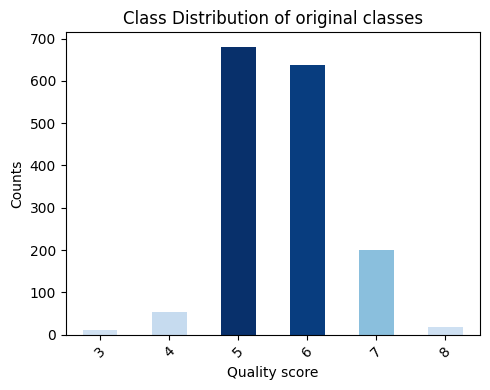

In [ ]:
#plot frequency of classes
value_counts = value_counts.sort_index()
normalized_counts = (value_counts - value_counts.min()) / (value_counts.max() - value_counts.min())* 0.8 + 0.2

# Define colors based on normalized counts
colors = plt.cm.Blues(normalized_counts)

# Plotting
plt.figure(figsize=(5, 4))
value_counts.plot(kind='bar', color=colors)
plt.xlabel('Quality score')
plt.ylabel('Counts')
plt.title('Class Distribution of original classes')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility if needed
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [ ]:
#train-test split keeping ratio of each training class equal using stratify
Shuffle_state = 4720
X_trainunscaled, X_testunscaled, y_train, y_test = train_test_split(X_1,y, test_size=0.25,random_state=4720,stratify = y)

In [ ]:
#Scaling of train set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_trainunscaled)

In [ ]:
#Scaling of test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_testunscaled)

In [ ]:
#ratio of total data
ratio = (df['quality'].value_counts()/ len(df))*100
ratio

5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64

In [ ]:
#ratio of test data
ratio = (y_test.value_counts())
ratio

5    170
6    160
7     50
4     13
8      5
3      2
Name: quality, dtype: int64

In [ ]:
#ratio of test data
ratio = (y_test.value_counts()/ df['quality'].value_counts())*100
ratio

5    24.963289
6    25.078370
7    25.125628
4    24.528302
8    27.777778
3    20.000000
Name: quality, dtype: float64

In [ ]:
#ratio of test data
ratio = (y_train.value_counts()/ df['quality'].value_counts())*100
ratio

5    75.036711
6    74.921630
7    74.874372
4    75.471698
8    72.222222
3    80.000000
Name: quality, dtype: float64

In [ ]:
#model evaluation function
labels = ['Bad', 'Good']
def model_evaluation(y_test,y_prediction,labels):
    Accuracy = accuracy_score(y_test, y_prediction)
    print("Accuracy: " + str(Accuracy*100))
    cm = confusion_matrix(y_test, y_prediction)
    print(cm)

## NON BAYESIAN METHODS

### SVM

In [ ]:
#parameters for cross validation for SVM
svm_param_grid = {'C': [0.01, 0.1, 1,10,100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Hyperparameter tuning for SVM using random search
start_time = time.time()
svc = SVC()
#svc_grid = GridSearchCV(svc, svm_param_grid,cv=5)
svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid.fit(X_train, y_train)
best_svc_params = svc_grid.best_params_
best_svc = svc_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 4.015805959701538 seconds


In [ ]:
#Best SVC parameter from the random search
print('{}:{}'.format(best_svc_params,best_svc))

{'gamma': 1, 'C': 1}:SVC(C=1, gamma=1)


In [ ]:
#SVM model training using best random search parameters

clf_svm = SVC(C=1,gamma=1, kernel='rbf')
clf_svm.fit(X_train, y_train)
y_prediction_svm = clf_svm.predict(X_test)

In [ ]:
#SVM model evaluation for random search
model_evaluation(y_test,y_prediction_svm,labels)

Accuracy: 64.25
[[  0   0   1   1   0   0]
 [  0   0   9   4   0   0]
 [  0   0 132  37   1   0]
 [  0   0  47 106   7   0]
 [  0   0   6  25  19   0]
 [  0   0   0   4   1   0]]


In [ ]:
#parameters for cross validation for SVM
svm_param_grid = {'C': [0.01, 0.1, 1],'gamma': [0.001, 0.01, 0.1, 1],'kernel': ['linear', 'rbf', 'poly']}

In [ ]:
#Hyperparameter tuning for SVM using gridsearch
start_time = time.time()
svc2 = SVC()
svc_grid2 = GridSearchCV(svc2, svm_param_grid,cv=5)
#svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid2.fit(X_train, y_train)
best_svc_params2 = svc_grid2.best_params_
best_svc2 = svc_grid2.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 16.483370542526245 seconds


In [ ]:
#Best SVC parameter from the grid search
print('{}:{}'.format(best_svc_params2,best_svc2))

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}:SVC(C=1, gamma=1)


In [ ]:
#SVM model training using grid search parameters
clf_svm2 = SVC(C=1,gamma=1, kernel='rbf')
clf_svm2.fit(X_train, y_train)
y_prediction_svm2 = clf_svm2.predict(X_test)

In [ ]:
#SVM model evaluation
model_evaluation(y_test,y_prediction_svm2,labels)

Accuracy: 64.25
[[  0   0   1   1   0   0]
 [  0   0   9   4   0   0]
 [  0   0 132  37   1   0]
 [  0   0  47 106   7   0]
 [  0   0   6  25  19   0]
 [  0   0   0   4   1   0]]


### Logistic Regression

In [ ]:
#parameters for grid search for Logistic Regression
LR_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'multi_class' : ['ovr', 'multinomial']}

In [ ]:
#Hyperparameter tuning for LR using gridsearch
start_time = time.time()
LR = LogisticRegression(max_iter = 2000)
LR_grid = GridSearchCV(LR, LR_param_grid,cv=5)
#LR_grid = RandomizedSearchCV(estimator = LR, param_distributions = LR_param_grid, cv=5, random_state=42)
LR_grid.fit(X_train, y_train)
best_LR_params = LR_grid.best_params_
best_LR = LR_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 1.7108848094940186 seconds


In [ ]:
#Best LR parameter from the grid search
print('{}'.format(best_LR_params))

{'C': 0.1, 'multi_class': 'multinomial'}


In [ ]:
#LR model training

clf_lr = LogisticRegression(C = 0.1,multi_class= 'multinomial' )
clf_lr.fit(X_train, y_train)
y_prediction_lr = clf_lr.predict(X_test)

In [ ]:
#LR model evaluation
model_evaluation(y_test,y_prediction_lr,labels)

Accuracy: 59.0
[[  0   0   2   0   0   0]
 [  0   0   6   7   0   0]
 [  0   1 129  40   0   0]
 [  0   0  57  94   9   0]
 [  0   0   4  33  13   0]
 [  0   0   0   1   4   0]]


### Random Forest

In [ ]:
from scipy import stats

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50],'min_samples_split': list(stats.randint(1, 30 + 1).rvs(size=29)), 'min_samples_leaf': list(stats.randint(1, 30 + 1).rvs(size=29))}

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30],'min_samples_split': list(range(2,5)), 'min_samples_leaf': list(range(2,5))}

In [ ]:
#Random search for hyperparameter tuning for random forest
start_time = time.time()
RF = RandomForestClassifier(random_state=42)
RF_grid = RandomizedSearchCV(estimator = RF, param_distributions = RF_param_grid, cv=5, random_state=42)
#RF_grid = GridSearchCV(RF, RF_param_grid,cv=5)
RF_grid.fit(X_train, y_train)
best_RF_params = RF_grid.best_params_
best_RF = RF_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 18.26458215713501 seconds


In [ ]:
#Best hyperparameter from the random forest
print('{}'.format(best_RF_params))

{'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 20}


In [ ]:
#RF model training
clf_RF = RandomForestClassifier(n_estimators = 200, random_state=42, max_depth = 20,min_samples_leaf = 2,min_samples_split= 3)
clf_RF.fit(X_train, y_train)
y_prediction_RF = clf_RF.predict(X_test)

In [ ]:
#RF model evaluation
model_evaluation(y_test,y_prediction_RF,labels)

Accuracy: 65.0
[[  0   0   1   1   0   0]
 [  0   0   8   5   0   0]
 [  0   0 134  34   2   0]
 [  0   0  47 103  10   0]
 [  0   0   2  25  23   0]
 [  0   0   0   3   2   0]]


### KNN

In [ ]:
knn_param_grid = {
    'n_neighbors': list(range(1, 10))
}

In [ ]:
#Grid search for hyperparameter tuning for knn
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
#knn_grid = RandomizedSearchCV(estimator = knn_model, param_distributions = knn_param_grid, cv=10, random_state=42)
knn_grid.fit(X_train, y_train)
best_knn_params = knn_grid.best_params_
best_knn = knn_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.6631667613983154 seconds


In [ ]:
#Best hyperparameter from the knn
print('{}'.format(best_knn_params))

{'n_neighbors': 1}


In [ ]:
#knn model training
clf_knn = KNeighborsClassifier(n_neighbors = 1)
clf_knn.fit(X_train, y_train)
knn_predictions = clf_knn.predict(X_test)

In [ ]:
#KNN model evaluation
model_evaluation(y_test,knn_predictions,labels)

Accuracy: 63.0
[[  0   0   1   1   0   0]
 [  0   2   7   4   0   0]
 [  1   4 125  35   4   1]
 [  0   7  42  95  16   0]
 [  0   0   4  15  30   1]
 [  0   0   0   2   3   0]]


### MLP

In [ ]:
#hyperparameters for the mlp
mlp_param_grid = {'hidden_layer_sizes': [(50), (50,50), (100,100,100)], 'alpha': [0.0001, 0.001, 0.01], 'activation': ['relu', 'tanh'],'solver': ['adam', 'sgd'], 'max_iter': [300, 400, 500]}

In [ ]:
#Random search for hyperparameter tuning for mlp
start_time = time.time()
mlp_classifier = MLPClassifier(random_state=42)
mlp_grid = RandomizedSearchCV(estimator = mlp_classifier, param_distributions = mlp_param_grid, cv=5, random_state=42)
mlp_grid.fit(X_train, y_train)
best_mlp_params = mlp_grid.best_params_
best_mlp = mlp_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Runtime: 119.48844575881958 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print('{}:{}'.format(best_mlp_params,best_mlp))

{'solver': 'adam', 'max_iter': 400, 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'tanh'}:MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=400,
              random_state=42)


In [ ]:
#mlp training
mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50, 50),solver = 'adam',activation = 'tanh',max_iter= 400, random_state = 42)
mlp.fit(X_train, y_train)
y_prediction_mlp = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#MLP model evaluation
model_evaluation(y_test,y_prediction_mlp,labels)

Accuracy: 58.5
[[  0   0   1   1   0   0]
 [  0   0   7   6   0   0]
 [  0   7 120  40   3   0]
 [  0   2  53  89  16   0]
 [  0   0   5  19  25   1]
 [  0   0   0   2   3   0]]


### Naive Bayes

In [ ]:
param_grid = {
    'priors': [None, [0.3, 0.7], [0.1, 0.9]],
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [ ]:
#Grid search for hyperparameter tuning for naive bayes
start_time = time.time()
nb_model = GaussianNB()
nb_grid = GridSearchCV(nb_model, param_grid, cv=5)
nb_grid.fit(X_train, y_train)
best_nb_params = nb_grid.best_params_
best_nb = nb_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.06712055206298828 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 454, in _partial_fit
    raise ValueError("Number of priors must match number of classes.")
ValueError: Number of prio

In [ ]:
#Best hyperparameter from the naive bayes
print('{}'.format(best_nb))

GaussianNB()


In [ ]:
#RF model training
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
nb_predictions = clf_nb.predict(X_test)

In [ ]:
#Naive Bayes model evaluation
model_evaluation(y_test,nb_predictions,labels)

Accuracy: 53.0
[[  0   0   2   0   0   0]
 [  0   3   5   5   0   0]
 [  2   6 114  43   5   0]
 [  0   8  53  69  29   1]
 [  0   0   2  22  25   1]
 [  0   0   0   0   4   1]]


## BAYESIAN METHODS
### RVM

In [ ]:
#RVM model training
start_time = time.time()
rvm = RVC(kernel='linear')
rvm.fit(X_train, y_train)
rvm_predictions = rvm.predict(X_test)
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

/usr/local/lib/python3.10/dist-packages/skrvm/rvm.py:239: RuntimeWarning: divide by zero encountered in log
  np.sum(np.log(1-y[t == 0]), 0))


Runtime: 157.9138159751892 seconds


In [ ]:
#RVM model evaluation
model_evaluation(y_test,rvm_predictions,labels)

Accuracy: 57.99999999999999
[[  0   0   2   0   0   0]
 [  0   0   6   7   0   0]
 [  0   1 129  40   0   0]
 [  0   0  59  89  12   0]
 [  0   0   4  32  14   0]
 [  0   0   0   1   4   0]]


# SMOTE THRESHOLD >=7

In [ ]:
#extract features and class
X_2 = df_copy[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_2 = df_copy['quality']

In [ ]:
#train-test split keeping ratio of each training class equal using stratify
Shuffle_state = 4720
X_trainunscaled, X_testunscaled, y_train_xx, y_test = train_test_split(X_2,y_2, test_size=0.25,random_state=4720,stratify = y_2)

In [ ]:
sm = SMOTE(random_state=14)
#sm = RandomUnderSampler(random_state=42)
X_train, y_train = sm.fit_resample(X_trainunscaled, y_train_xx)

#sm = RandomUnderSampler(random_state=42)

In [ ]:
print("Before smote --> ", collections.Counter(y_train_xx))
print("After smote --> ", collections.Counter(y_train))

Before smote -->  Counter({'Bad': 1036, 'Good': 163})
After smote -->  Counter({'Bad': 1036, 'Good': 1036})


In [ ]:
#Scaling of train set
scaler = StandardScaler()
X_trainunscaled = scaler.fit_transform(X_trainunscaled)

In [ ]:
#Scaling of test set
scaler = StandardScaler()
X_test = scaler.fit_transform(X_testunscaled)

In [ ]:
#ratio of test data
ratio = (y_train.value_counts())
ratio

Bad     1036
Good    1036
Name: quality, dtype: int64

In [ ]:
#ratio of test data
ratio = (y_test.value_counts()/ df_copy['quality'].value_counts())*100
ratio

Bad     25.036179
Good    24.884793
Name: quality, dtype: float64

In [ ]:
#model evaluation function
labels = ['Bad', 'Good']
def model_evaluation(y_test,y_prediction, labels):
    Accuracy = accuracy_score(y_test, y_prediction)
    print("Accuracy: " + str(Accuracy*100))
    F1 = f1_score(y_test, y_prediction,average = 'macro')
    print("F1 score: " + str(F1*100))
    cm = confusion_matrix(y_test, y_prediction)
    print(cm)

## NON BAYESIAN METHODS

### SVM

In [ ]:
#parameters for cross validation for SVM
svm_param_grid = {'kernel': ['linear', 'rbf'], 'C': [0.01, 0.1, 1,10,100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Hyperparameter tuning for SVM using random search
start_time = time.time()
svc = SVC()
#svc_grid = GridSearchCV(svc, svm_param_grid,cv=5)
svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid.fit(X_train, y_train)
best_svc_params = svc_grid.best_params_
best_svc = svc_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 42.88693690299988 seconds


In [ ]:
#Best SVC parameter from the random search
print('{}:{}'.format(best_svc_params,best_svc))

{'kernel': 'rbf', 'gamma': 10, 'C': 10}:SVC(C=10, gamma=10)


In [ ]:
#SVM model training using best random search parameters

clf_svm = SVC(C=10,gamma=10, kernel='rbf')
clf_svm.fit(X_train, y_train)
y_prediction_svm = clf_svm.predict(X_test)

In [ ]:
#SVM model evaluation for random search
model_evaluation(y_test,y_prediction_svm, labels)

Accuracy: 89.25
F1 score: 63.99790685504971
[[346   0]
 [ 43  11]]


In [ ]:
#Hyperparameter tuning for SVM using gridsearch
start_time = time.time()
svc2 = SVC()
svc_grid2 = GridSearchCV(svc2, svm_param_grid,cv=5)
#svc_grid = RandomizedSearchCV(estimator = svc, param_distributions = svm_param_grid, cv=5, random_state = 42)
svc_grid2.fit(X_train, y_train)
best_svc_params2 = svc_grid2.best_params_
best_svc2 = svc_grid2.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 124.83867144584656 seconds


In [ ]:
#SVM model training using grid search parameters
clf_svm2 = SVC(C=1,gamma=1, kernel='rbf')
clf_svm2.fit(X_train, y_train)
y_prediction_svm2 = clf_svm2.predict(X_test)

In [ ]:
#SVM model evaluation
model_evaluation(y_test,y_prediction_svm2,labels)

Accuracy: 89.0
F1 score: 70.73689811119979
[[336  10]
 [ 34  20]]


### Logistic Regression

In [ ]:
#parameters for grid search for Logistic Regression
LR_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
#Hyperparameter tuning for LR using gridsearch
start_time = time.time()
LR = LogisticRegression(max_iter = 2000)
LR_grid = GridSearchCV(LR, LR_param_grid,cv=5)
#LR_grid = RandomizedSearchCV(estimator = LR, param_distributions = LR_param_grid, cv=5, random_state=42)
LR_grid.fit(X_train, y_train)
best_LR_params = LR_grid.best_params_
best_LR = LR_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.5819718837738037 seconds


In [ ]:
#Best LR parameter from the grid search
print('{}'.format(best_LR_params))

{'C': 1}


In [ ]:
#LR model training

clf_lr = LogisticRegression(C = 1)
clf_lr.fit(X_train, y_train)
y_prediction_lr = clf_lr.predict(X_test)

In [ ]:
#LR model evaluation
model_evaluation(y_test,y_prediction_lr,labels)

Accuracy: 78.25
F1 score: 67.08005789369129
[[273  73]
 [ 14  40]]


### Random Forest

In [ ]:
from scipy import stats

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [10, 20, 30, 40, 50],'min_samples_split': list(stats.randint(1, 30 + 1).rvs(size=29)), 'min_samples_leaf': list(stats.randint(1, 30 + 1).rvs(size=29))}

In [ ]:
#parameters for hyperparameter tuning for Random Forest
RF_param_grid = {'n_estimators': [100, 200, 300, 400], 'max_depth': [10, 20, 30, 40],'min_samples_split': list(range(2,10)), 'min_samples_leaf': list(range(2,10))}

In [ ]:
#Random search for hyperparameter tuning for random forest
start_time = time.time()
RF = RandomForestClassifier(random_state=42)
RF_grid = RandomizedSearchCV(estimator = RF, param_distributions = RF_param_grid, cv=5, random_state=42)
#RF_grid = GridSearchCV(RF, RF_param_grid,cv=5)
RF_grid.fit(X_train, y_train)
best_RF_params = RF_grid.best_params_
best_RF = RF_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 46.205225229263306 seconds


In [ ]:
#RF model training
clf_RF = RandomForestClassifier(n_estimators = 400, random_state=42, max_depth = 40,min_samples_leaf = 2,min_samples_split= 2)
clf_RF.fit(X_train, y_train)
y_prediction_RF = clf_RF.predict(X_test)

In [ ]:
#RF model evaluation
model_evaluation(y_test,y_prediction_RF,labels)

Accuracy: 87.0
F1 score: 74.85371633057692
[[313  33]
 [ 19  35]]


### KNN

In [ ]:
knn_param_grid = {
    'n_neighbors': list(range(1, 10))
}

In [ ]:
#Grid search for hyperparameter tuning for knn
start_time = time.time()
knn_model = KNeighborsClassifier()
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=5)
#knn_grid = RandomizedSearchCV(estimator = knn_model, param_distributions = knn_param_grid, cv=10, random_state=42)
knn_grid.fit(X_train, y_train)
best_knn_params = knn_grid.best_params_
best_knn = knn_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 1.745279312133789 seconds


In [ ]:
#Best hyperparameter from the knn
print('{}'.format(best_knn_params))

{'n_neighbors': 2}


In [ ]:
#RF model training
clf_knn = KNeighborsClassifier(n_neighbors = 2)
clf_knn.fit(X_train, y_train)
knn_predictions = clf_knn.predict(X_test)

In [ ]:
#KNN model evaluation
model_evaluation(y_test,knn_predictions,labels)

Accuracy: 85.0
F1 score: 72.09821428571428
[[306  40]
 [ 20  34]]


### MLP

In [ ]:
#hyperparameters for the mlp
mlp_param_grid = {'hidden_layer_sizes': [(50), (50,50), (100,100,100)], 'alpha': [0.0001, 0.001, 0.01], 'activation': ['relu', 'tanh'],'solver': ['adam', 'sgd'], 'max_iter': [300, 400, 500]}

In [ ]:
#Random search for hyperparameter tuning for mlp
start_time = time.time()
mlp_classifier = MLPClassifier(random_state=42)
mlp_grid = RandomizedSearchCV(estimator = mlp_classifier, param_distributions = mlp_param_grid, cv=5, random_state=42)
mlp_grid.fit(X_train, y_train)
best_mlp_params = mlp_grid.best_params_
best_mlp = mlp_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Runtime: 445.0853090286255 seconds


In [ ]:
print('{}:{}'.format(best_mlp_params,best_mlp))

{'solver': 'adam', 'max_iter': 500, 'hidden_layer_sizes': (50, 50), 'alpha': 0.0001, 'activation': 'relu'}:MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)


In [ ]:
#mlp training
mlp = MLPClassifier(alpha=0.0001, hidden_layer_sizes=(50,50),solver = 'adam',activation = 'relu',max_iter= 500, random_state = 42)
mlp.fit(X_train, y_train)
y_prediction_mlp = mlp.predict(X_test)

In [ ]:
#MLP model evaluation
model_evaluation(y_test,y_prediction_mlp,labels)

Accuracy: 87.75
F1 score: 72.23756710434992
[[325  21]
 [ 28  26]]


### Naive Bayes

In [ ]:
param_grid = {
    'priors': [None, [0.3, 0.7], [0.1, 0.9]],
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

In [ ]:
#Grid search for hyperparameter tuning for naive bayes
start_time = time.time()
nb_model = GaussianNB()
nb_grid = GridSearchCV(nb_model, param_grid, cv=5)
nb_grid.fit(X_train, y_train)
best_nb_params = nb_grid.best_params_
best_nb = nb_grid.best_estimator_
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 0.2615671157836914 seconds


In [ ]:
#Best hyperparameter from the naive bayes
print('{}'.format(best_nb))

GaussianNB()


In [ ]:
#NB model training
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)
nb_predictions = clf_nb.predict(X_test)

In [ ]:
#Naive Bayes model evaluation
model_evaluation(y_test,nb_predictions,labels)

Accuracy: 74.75
F1 score: 64.75647948635186
[[256  90]
 [ 11  43]]


## BAYESIAN METHODS
### RVM

In [ ]:
#RVM model training
start_time = time.time()
rvm = RVC(kernel='linear')
rvm.fit(X_train, y_train)
rvm_predictions = rvm.predict(X_test)
end_time = time.time()
runtime = end_time - start_time
print("Runtime:", runtime, "seconds")

Runtime: 201.6459710597992 seconds


In [ ]:
#RVM model evaluation
model_evaluation(y_test,rvm_predictions,labels)

Accuracy: 77.75
F1 score: 66.61634111347631
[[271  75]
 [ 14  40]]
